In [20]:
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 랜덤하게 각 주식의 가격 100개의 데이터 생성
# 삼성데이터를 만들어 봅시다.
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')  # 시계열 데이터를 만들기 위해 시간형식의 값을 생성합니다.
samsung_prices=[random.randint(80000,90000) for _ in range(100)]  # 값의 범위를 지정후 임의 값을 생성합니다.
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}  # 현업에서는 딕셔너리 형태를 많이 사용합니다. 빠르기 때문입니다.
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# LG데이터를 만들어 봅시다.
lg_prices=[random.randint(140000,160000) for _ in range(100)]
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

# 삼성과 LG 데이터를 합쳐봅시다,
df = pd.concat([samsung_df, lg_df], axis=1)
df = df.loc[:, ['005930.KS', '066570.KS']]
df.columns = ['Samsung', 'LG']

# 엑셀파일로 저장하기 위해 명령어를 실행할 때 마다 폴더를 생성하도록 설정합니다.
os.makedirs("./", exist_ok=True)  # 이미 폴더가 생성되어있어도 덮어씌우기 합니다.

# 엑셀파일로 저장합시다.
df.to_csv("./stock_price.csv")

In [21]:
# 저장한 엑셀파일을 불러와 봅시다.
df = pd.read_csv('./stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 삼성과 LG의 수익률을 계산해봅시다.
returns = df.pct_change()  # 수익률 계산 모듈
print(returns)  # 맨 앞에 있는 데이터는 비교할 대상이 없기 때문에 NULL 값이 뜹니다.

             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.018094 -0.058787
2021-01-06 -0.057141  0.013390
2021-01-07  0.073317  0.044150
2021-01-08  0.018087  0.016571
...              ...       ...
2021-04-09  0.044799  0.088191
2021-04-10  0.007846 -0.064055
2021-04-11 -0.081291  0.072147
2021-04-12  0.020399 -0.063910
2021-04-13 -0.038273 -0.002778

[100 rows x 2 columns]


In [22]:
# 수익률 상관 계수를 계산해봅시다.
corr_matrix = returns.corr()
print(corr_matrix)

          Samsung        LG
Samsung  1.000000  0.170353
LG       0.170353  1.000000


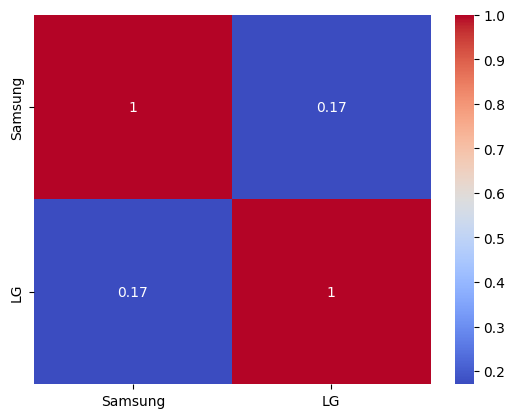

In [23]:
# 히트맵을 그려서 한 눈에 파악해봅시다.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()